In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(42)
n_samples = 1000

In [3]:
data = pd.DataFrame({
    'temperature': np.random.normal(75, 10, n_samples),  # Mean 75, Std Dev 10
    'pressure': np.random.normal(50, 5, n_samples),      # Mean 50, Std Dev 5
    'vibration': np.random.normal(0.3, 0.1, n_samples),  # Mean 0.3, Std Dev 0.1
    'maintenance': np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3]),  # 70% no maintenance
    'failure': np.random.choice([0, 1], size=n_samples, p=[0.8, 0.2])       # 20% failure rate
})

In [4]:
print("Dataset Overview:")
print(data.head())

Dataset Overview:
   temperature   pressure  vibration  maintenance  failure
0    79.967142  56.996777   0.232482            1        1
1    73.617357  54.623168   0.285548            1        0
2    81.476885  50.298152   0.220758            0        1
3    90.230299  46.765316   0.269204            1        0
4    72.658466  53.491117   0.110639            0        0


In [5]:
X = data.drop('failure', axis=1)
y = data['failure']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


Model Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86       227
           1       0.38      0.04      0.07        73

    accuracy                           0.75       300
   macro avg       0.57      0.51      0.46       300
weighted avg       0.67      0.75      0.67       300


Confusion Matrix:


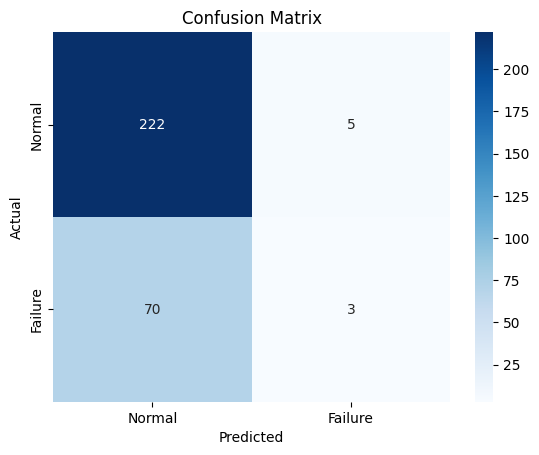

In [8]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy:", accuracy)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Failure'], yticklabels=['Normal', 'Failure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [9]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importances)


Feature Importance:
temperature    0.333240
pressure       0.320532
vibration      0.313640
maintenance    0.032588
dtype: float64


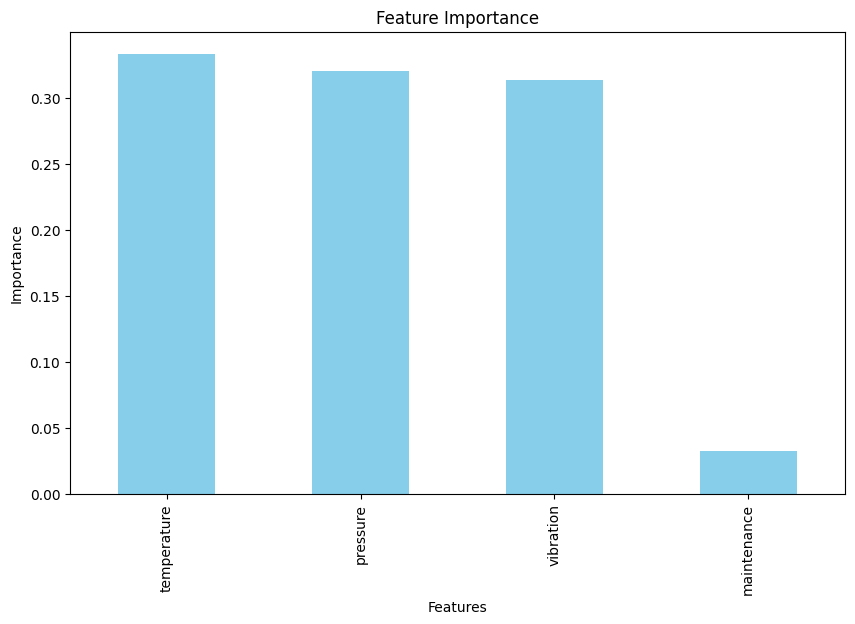

In [10]:
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar', color='skyblue')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [11]:
import joblib
joblib.dump(model, 'machine_failure_model.pkl')
print("\nModel saved as 'machine_failure_model.pkl'")


Model saved as 'machine_failure_model.pkl'
